In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import idun_sdk # Internal IDUN SDK for preprocessing etc.

In [3]:
markerExampleData = 'recordings/meta/003_lp/markers_winking_05122022_185249.csv'

df = pd.read_csv(markerExampleData)
df.head() # Example if it works

,timestamp,marker
0,1.670263e+09,left
1,1.670263e+09,right
2,1.670263e+09,left
3,1.670263e+09,right
4,1.670263e+09,left


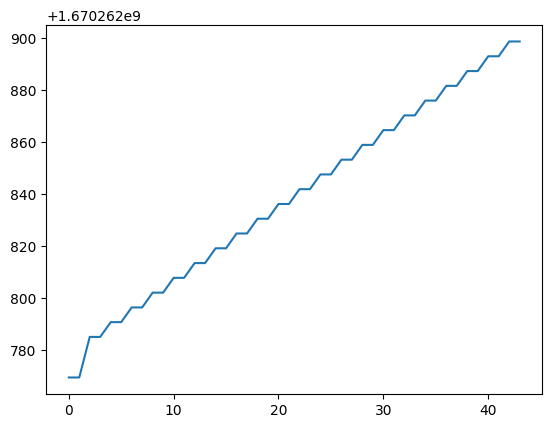

In [4]:
# Plot the markers in a line plot
plt.plot(df['timestamp'])

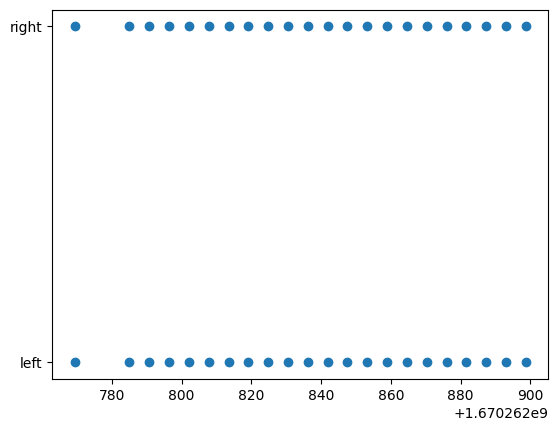

In [5]:
# Plot the markers in a scatter plot
plt.scatter(df['timestamp'], df['marker'])

<AxesSubplot: xlabel='timestamp'>

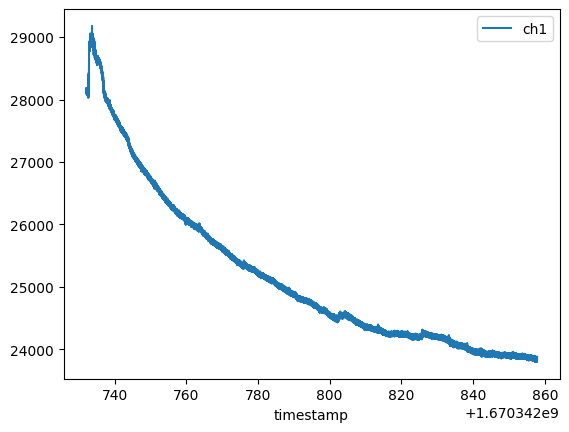

In [6]:
markerData = 'markers.csv'
eegData = 'eeg.csv'

dfMarkers = pd.read_csv(markerData)
dfEEG = pd.read_csv(eegData)

# plot the eeg data in a line chart
dfEEG.plot(x='timestamp', y='ch1')

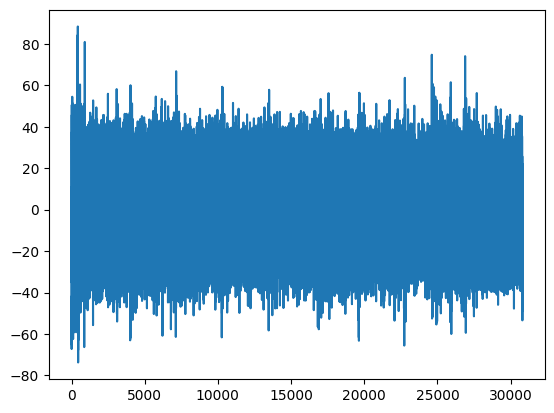

In [7]:
filteredData = idun_sdk.do_highpass(dfEEG['ch1'], 2, 250)
# remove the first few seconds of the data
newFilteredData = filteredData[750:]

# take the markers and plot them on the eeg data
# plt.plot(newFilteredData)

# take the markers from the markers file and plot them on the eeg data, each marker should be a vertical line
plt.plot(newFilteredData)

# plot the filtered data
# plt.plot(newFilteredData)

In [8]:
# import csv

# # read in the data from the CSV file
# with open('markers.csv') as csvfile:
#     reader = csv.reader(csvfile)
#     # skip the first row (the header row)
#     next(reader)
#     rows = [row for row in reader]

# timestamps = []
# for row in rows:
#     timestamp = int(row[0].replace('.', ''))
#     timestamps.append(timestamp)

# with open('markers.csv', 'w') as csvfile:
#     writer = csv.writer(csvfile)
#     for row in rows:
#         # update the timestamp value in the row
#         row[0] = int(row[0].replace('.', ''))
#         writer.writerow(row)

In [9]:
import csv

# Set the maximum difference in timestamp between the markers and eeg data
# to consider them "aligned"
MAX_TIMESTAMP_DIFF = 0.1

# Read the markers from the markers.csv file
markers = []
with open("markers.csv") as f:
    reader = csv.reader(f)
    # Skip the header row
    next(reader)
    for row in reader:
        timestamp = float(row[0])
        marker = row[1]
        markers.append((timestamp, marker))

# Read the eeg data from the eeg.csv file
eeg_data = []
with open("eeg.csv") as f:
    reader = csv.reader(f)
    # Skip the header row
    next(reader)
    for row in reader:
        timestamp = float(row[0])
        ch1 = float(row[1])
        eeg_data.append((timestamp, ch1))

merged = []
marker_index = 0
for timestamp, ch1 in eeg_data:
    # If the timestamp of the current marker is within the maximum
    # allowed difference from the timestamp of the current eeg data,
    # and if the marker_index is within the bounds of the markers list,
    # append the marker to the merged data
    if marker_index < len(markers) and abs(timestamp - markers[marker_index][0]) < MAX_TIMESTAMP_DIFF:
        merged.append((timestamp, ch1, markers[marker_index][1]))
        marker_index += 1
    else:
        merged.append((timestamp, ch1))

# Write the merged data to a new csv file
with open("merged.csv", "w") as f:
    writer = csv.writer(f)
    # Write the header row
    writer.writerow(["timestamp", "ch1", "marker"])
    for row in merged:
        writer.writerow(row)



<AxesSubplot: xlabel='timestamp'>

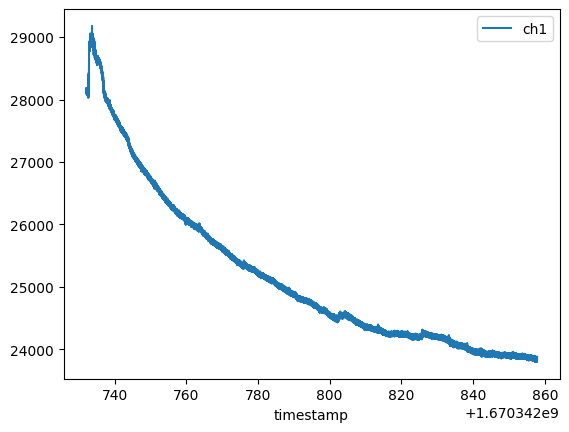

In [10]:
# get the merged.csv file and load it into a dataframe
dfMergedNew = pd.read_csv('merged.csv')

# plot the ch1 column of the merged data
dfMergedNew.plot(x='timestamp', y='ch1')


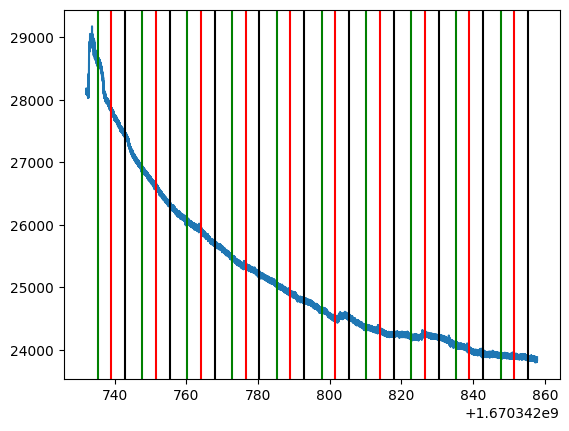

In [11]:
# Read the merged data from the merged.csv file
timestamps = []
ch1_values = []
markers = []
with open("merged.csv") as f:
    reader = csv.reader(f)
    # Skip the header row
    next(reader)
    for row in reader:
        timestamps.append(float(row[0]))
        ch1_values.append(float(row[1]))
        # If the row has a marker, append it to the markers list
        # Otherwise, append None
        if len(row) > 2:
            markers.append(row[2])
        else:
            markers.append(None)

# Plot the timeseries data
plt.plot(timestamps, ch1_values)

# Add vertical lines at the points where markers are present
for i, marker in enumerate(markers):
    if marker is not None:
        if marker == "left":
            color = "green"
        elif marker == "right":
            color = "red"
        elif marker == "waiting":
            color = "black"
        else:
            color = "gray"
        plt.axvline(timestamps[i], color=color)

plt.show()


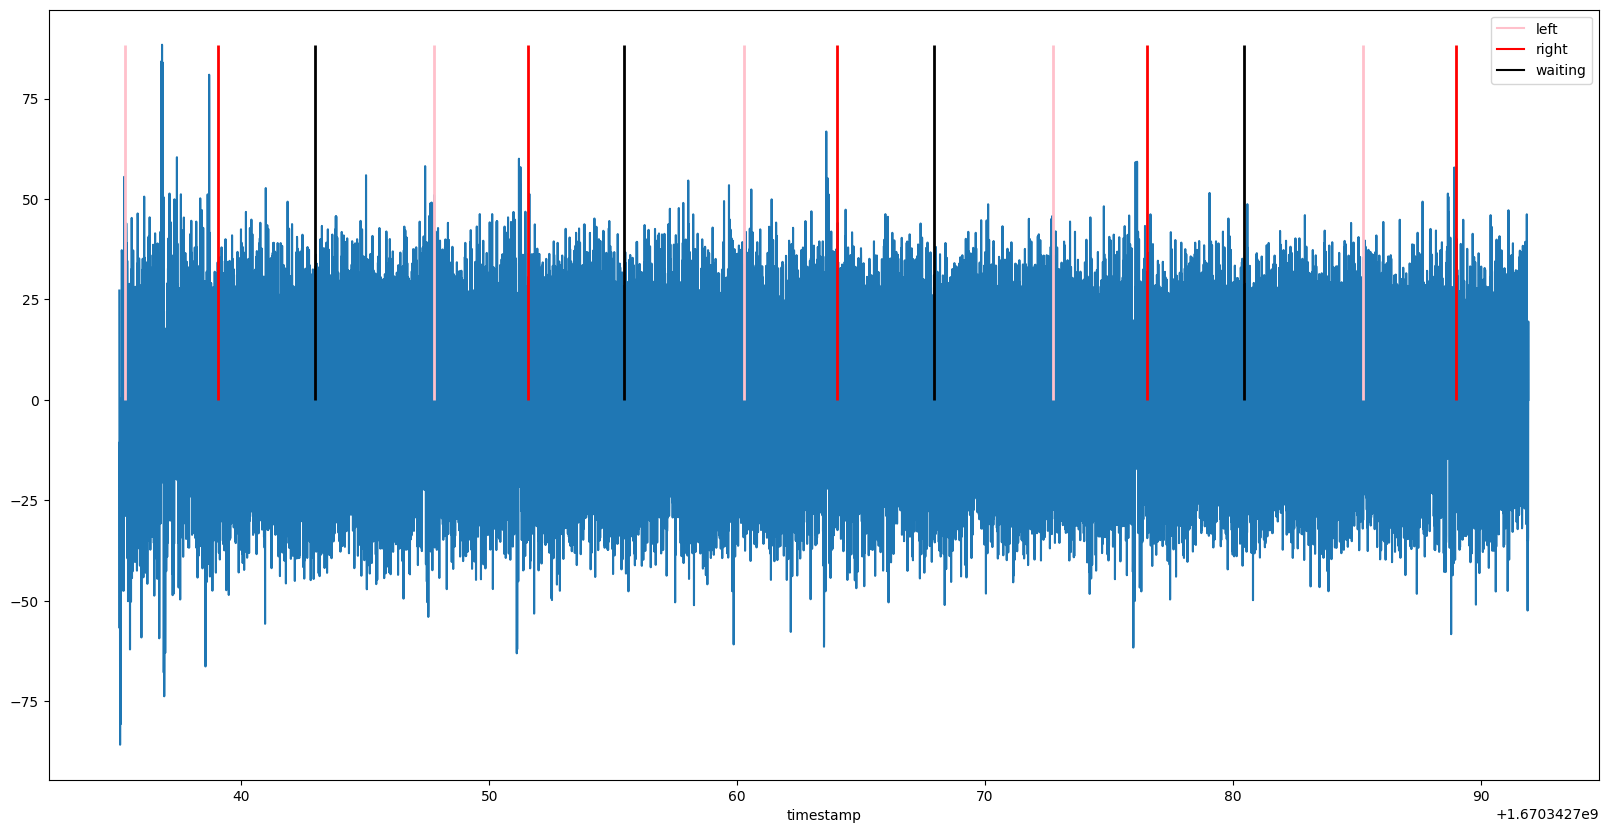

In [14]:
import numpy as np
import pandas as pd
import idun_sdk # Internal IDUN SDK for preprocessing etc


dfMergedNew = pd.read_csv('merged.csv')[750:15000]
filteredNewNewData = idun_sdk.do_highpass(dfMergedNew['ch1'], 2, 250)

# merge the filtered data with the dataframe on the ch1 column
dfMergedNew['ch1'] = filteredNewNewData

# plot the ch1 column of the merged data
dfMergedNew.plot(x='timestamp', y='ch1', figsize=(20, 10))

# Get the x-coordinates of the markers from the timestamps
marker_timestamps = dfMergedNew[dfMergedNew["marker"].notnull()]["timestamp"]

# Get the y-coordinates of the markers
marker_y = dfMergedNew[dfMergedNew["marker"].notnull()]["ch1"]

# Get the colors of the markers
marker_colors = dfMergedNew[dfMergedNew["marker"].notnull()]["marker"].map({
    "left": "pink",
    "right": "red",
    "waiting": "black"
})

# Plot the markers as vertical lines
plt.vlines(marker_timestamps, 0, dfMergedNew["ch1"].max(), marker_colors, linewidth=2)
# create labels for the markers in the plot without Patches
plt.legend(handles=[plt.Line2D([], [], color=color, label=label) for label, color in zip(["left", "right", "waiting"], ["pink", "red", "black"])])
